# <center><font color='Sky blue' style="font-size:40px"><b>Exercises 12</b></font></center>

## <font color='Tomato'><b>Minimizing production costs</b></font>

In class we have discussed how firms from different markets determine optimal level of production. But this isn't the end of story.

One firm uses only **two production factors** - labour ($L$) and capital ($K$). **Production goal** of this firm is to produce exactly $q=100$ units of its product **at the minimal cost**.

Firms cost function is given by following expression:

$$TC=15\cdot L + 70 \cdot K$$

From it we can see that current cost of labour is $15$\\$ per hour, while cost of capital is $70$\\$ per hour.

At the same time **production function** of this firm is given by:

$$q=L^{0.3}\cdot K^{0.7}$$

Where exponents are econometrical estimates of partial elasticities. They tell us by how many percents the production ($q$) will increase if the given factor ($K$ or $L$) increases by 1%.

### A

a) Define total cost function as **symbolic expression** in Python.

* Since we need to perform **symbolic calculation** we need to import <font color='mediumseagreen'><b>SymPy</b></font>
    - GOOGLE COLAB needs an update

In [52]:
%pip install sympy -U

In [22]:
import sympy as sp

* Define **symbolic variables** for both production factors.
    * We can state **assumptions** about them:
        1. Real numbers (variables are work hours)
        2. Non negative numbers (work hours cannot be negative)

In [23]:
L,K =sp.symbols('L,K',real=True,nonnegative=True)

L,K

(L, K)

* Define total cost function as symbolic expression:

In [24]:
TC = 15*L+70*K
TC

70*K + 15*L

### B

b) Define appropriate **Lagrange function** for this constrained optimization.

$$(\min)\hspace{2mm}TC=15\cdot L + 70 \cdot K$$

$$\text{s.t.}\hspace{5mm}L^{0.3}\cdot K^{0.7}=100$$

- In this case Lagrange function is:
$$La=TC+\lambda (L^{0.3}\cdot K^{0.7}-100)$$

* Define missing symbolic variables
    - To create **Greek letters** use their names in English

In [36]:
l = sp.Symbol('lambda',real=True)
l

lambda

* Now we are rady to define Lagrange function as symbolic expression

In [37]:
La = TC + l*(L**0.3*K**0.7-100)

### C

c) Find **gradient** of Lagrange's function.

* To compute first derivative we use either method <font color='DeepPink'><b>diff</b></font> or function <font color='DodgerBlue'><b>sp.diff</b></font>
* State variables with respect to which you want to calculate derivatives and order of derivation $\to$ output: Gradient (vector of first derivatives)

In [38]:
G=La.diff(([K,L,l],1))
G

[0.7*L**0.3*lambda/K**0.3 + 70, 0.3*K**0.7*lambda/L**0.7 + 15, K**0.7*L**0.3 - 100]

In [39]:
sp.diff(La,([K,L,l],1))

[0.7*L**0.3*lambda/K**0.3 + 70, 0.3*K**0.7*lambda/L**0.7 + 15, K**0.7*L**0.3 - 100]

d) Find **optimal solution** from first order conditions.

* First order condition: extreme value lies in point where first derivative is equal to zero
$$La'=0$$
    * Solve all three equations obtained in list above (**system of equations**)
    * They are already in **implicit form**

In [40]:
sol = sp.solve(G,[K,L,l])
sol

[(81.2252396356236, 162.450479271247, -81.2252396356236)]

- Solution is **list of triplets** (since we have three optimization variables)
- Let's **unpack** this values into seprate variables

In [42]:
sol[0]

(81.2252396356236, 162.450479271247, -81.2252396356236)

In [43]:
K_opt,L_opt,l_opt=sol[0]

### E

e) What is the **optimal** (lowest) **total cost** for production of 100 products?

* Use method <font color='DeepPink'><b>subs</b></font> to substitute symbolic variables in symbolic expression

In [63]:
TC.subs([(K,K_opt),(L,L_opt)])

8122.52396356236

f) Solve the same problem **numerically**. If you have done everything correct solutions should coincide (up to the rounding error).

* How we can perform the optimization?
    - **Analytically** (symbolically) - step-by-step via FOC
    - **Numerically** - with some algorithm which guesses optimal solution based on some method

#### Side Note: Maximization vs Minimization

* Optimization functions are written **only for minimization**. Is this a **problem**?
* Optimization **theory** states that:
$$(max) F = (min) -F$$

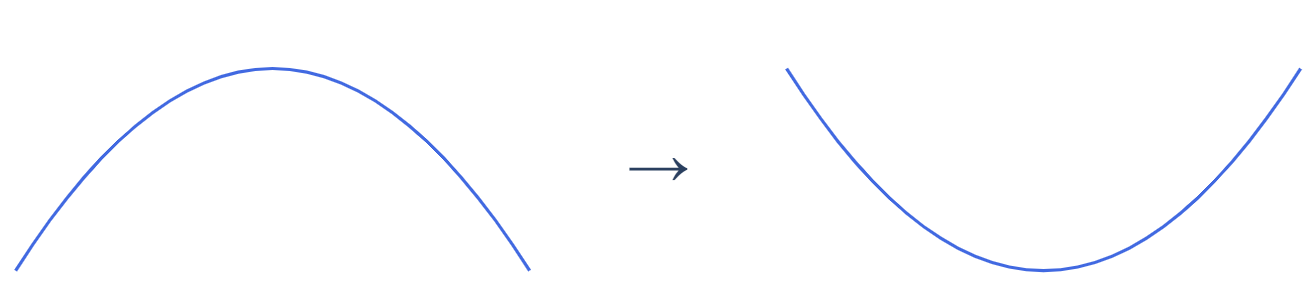

#### Continue with task f)

* To perform numerical optimization you need to import package <font color='mediumseagreen'><b>SciPy - Optimize</b></font>:

In [64]:
import scipy.optimize as sco

* We commonly use <font color='DodgerBlue'><b>sco.minimize</b></font>(goal_function, initial_guess, constraints)

* Technical notes:
    * You need to provide all expressions as numerical **Python functions** (here is convenient to use anonymous, i.e. **lambda functions**)
    * For multivariate optimization you need to **treat unknown variable as vector** from which you slice values

* Now we are ready for numerical optimization:

In [65]:
TC

70*K + 15*L

In [77]:
opt = sco.minimize(lambda f: 15*f[0]+70*f[1],
                   (50,50),
                    constraints=dict(type='eq',
                                     fun= lambda f: f[0]**0.03*f[1]**0.7-100))

In [78]:
opt

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 42832.52551045068
       x: [ 1.174e+02  5.867e+02]
     nit: 9
     jac: [ 1.500e+01  7.000e+01]
    nfev: 28
    njev: 9

- Result is an object called ***Optimization result***
- It behaves like a dictionary (so with appropriate key we can easily extract information that we desire from it)

In [70]:
opt.fun

42832.52551045068

In [60]:
opt.x

array([117.3503585 , 586.74671619])